# Black-Scholes Model

The Black-Scholes Modedl provides formulas for calculating the theoretical price of an European Call/Put option. Below you can find the formulas for both Call and Put Options:

For an **European Call Option**:

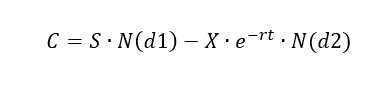

For an **European Put Option**:

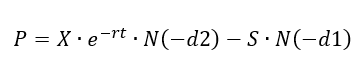

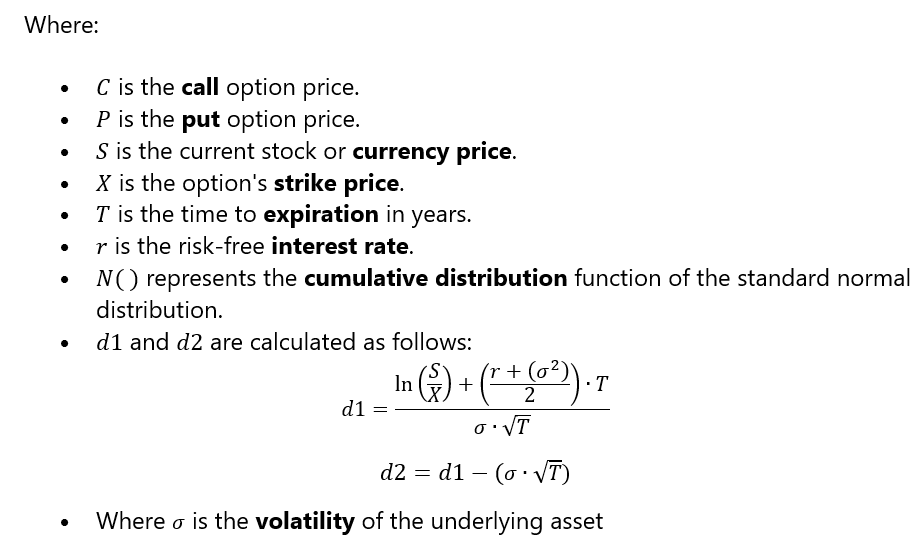

Below is some Python code using `scipy.stats` for the cumulative distribution function:

In [18]:
# Define Imports
import numpy as np
from enum import Enum
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import pandas as pd
import yfinance as yf
from scipy.stats import norm

In [19]:
# Function to calculate option prices

# Define an Enum for OptionType
class OptionType(Enum):
    CALL = 'call'
    PUT = 'put'

def black_scholes_model_european_call_put(S, X, T, r, sigma, option_type=OptionType.CALL):
    d1 = (np.log(S / X) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == OptionType.CALL:
        option_price = S * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == OptionType.PUT:
        option_price = X * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option_type. Use OptionType.CALL or OptionType.PUT.")

    return option_price

In [20]:
# Function to generate the results

def generate_black_scholes_model_output(S_range, X, T, r, sigma):
    # Calculate call and put option prices for the entire range of underlying asset prices
    option_data = {'Strike Prices': S_range, 'Call Prices': [], 'Put Prices': []}
    for S in S_range:
        call_price = black_scholes_model_european_call_put(S, X, T, r, sigma, option_type=OptionType.CALL)
        put_price = black_scholes_model_european_call_put(S, X, T, r, sigma, option_type=OptionType.PUT)
    
        option_data['Call Prices'].append(call_price)
        option_data['Put Prices'].append(put_price)

    # Create a DataFrame
    option_df = pd.DataFrame(option_data)
    
    return option_df

In [21]:
# Function to download latest ticker information and the calculated values we need

def download_data_ticker(stock_symbol, start_date, end_date):
    # Fetch historical stock price data from Yahoo Finance
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

    # Calculate daily returns
    stock_data['Daily Return'] = (stock_data['Adj Close'] / stock_data['Adj Close'].shift(1) - 1) * 100

    # Calculate historical volatility (standard deviation of daily returns)
    historical_volatility = np.std(stock_data['Daily Return'].dropna())

    # Calculate the price range (maximum and minimum prices during the period)
    price_range = {
        'Max Price': stock_data['Adj Close'].max(),
        'Min Price': stock_data['Adj Close'].min()
    }

    # Calculate the approximate strike price as the current closing price
    current_strike_price = stock_data['Adj Close'].iloc[-1]

    # Annualize the volatility
    trading_days_per_year = 252  # Approximate number of trading days in a year
    annualized_volatility = historical_volatility * np.sqrt(trading_days_per_year)

    print(f"Stock Symbol: {stock_symbol}")
    print(f"Historical Volatility: {historical_volatility:.2f}%")
    print(f"Price Range: {price_range['Min Price']:.2f} - {price_range['Max Price']:.2f}")
    print(f"Current Strike Price: {current_strike_price:.2f}")
    print(f"Annualized Volatility: {annualized_volatility:.2f}%")
    
    return price_range['Min Price'], price_range['Max Price'], current_strike_price, annualized_volatility

In [22]:
# Function to download the latest SOFR

def download_sofr(start_date, end_date):

    # Fetch SOFR data
    sofr_data = pdr.data.DataReader('SOFR', 'fred', start_date, end_date)

    # Print the latest SOFR rate
    latest_sofr_rate = sofr_data['SOFR'].iloc[-1]
    print(f"Latest SOFR Rate: {latest_sofr_rate:.4f}%")
    
    return latest_sofr_rate

In [29]:
# Plot individual results

def plot_individual_results(option_df):
    # Create subplots for call and put prices
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot call prices
    ax1.plot(option_df['Strike Prices'], option_df['Call Prices'], marker='o', linestyle='-', color='blue', label='Call Prices')
    ax1.set_xlabel(f'Strike Prices {stock_symbol}')
    ax1.set_ylabel('Option Prices')
    ax1.set_title('Call Option Prices vs. Strike Prices')
    ax1.grid(True)

    # Plot put prices
    ax2.plot(option_df['Strike Prices'], option_df['Put Prices'], marker='o', linestyle='-', color='red', label='Put Prices')
    ax2.set_xlabel(f'Strike Prices {stock_symbol}')
    ax2.set_ylabel('Option Prices')
    ax2.set_title('Put Option Prices vs. Strike Prices')
    ax2.grid(True)

    # Display legends
    ax1.legend()
    ax2.legend()

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

In [32]:
def plot_all_together(option_df):
    # Create a single subplot for both call and put prices
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot call prices
    ax.plot(option_df['Strike Prices'], option_df['Call Prices'], marker='o', linestyle='-', color='blue', label='Call Prices')

    # Plot put prices
    ax.plot(option_df['Strike Prices'], option_df['Put Prices'], marker='o', linestyle='-', color='red', label='Put Prices')

    # Set labels and title
    ax.set_xlabel(f'Strike Prices {stock_symbol}')
    ax.set_ylabel('Option Prices')
    ax.set_title('Call and Put Option Prices vs. Strike Prices')
    ax.grid(True)

    # Display legend
    ax.legend()

    # Show the plot
    plt.show()

## Test results for AAPL



In [23]:

# Define the stock symbol and date range for historical data
stock_symbol = 'AAPL'  # Replace with the symbol of the stock you want to analyze
stock_start_date = '2020-01-01'  # Replace with your desired start date
stock_end_date = '2023-10-08'    # Replace with your desired end date

# Define the start and end dates
start_date = '2023-09-25'  # Replace with the desired date
end_date = '2023-09-25'    # Replace with the same date as start_date

sofr = download_sofr(start_date, end_date)

min_range, max_range, strike_price, volatility = download_data_ticker(stock_symbol, stock_start_date, stock_end_date)

# Input values
S_range = np.arange(min_range, max_range, 0.1)  # Range of underlying asset prices (AAPL stock price)
X = strike_price  # Option strike price
T = 0.012  # Time to expiration in years (3 days -> 3/252 = 0.012)
r = sofr  # Risk-free interest rate
sigma = volatility  # Volatility

option_df = generate_black_scholes_model_output(S_range, X, T, r, sigma)

Latest SOFR Rate: 5.3100%
[*********************100%***********************]  1 of 1 completed
Stock Symbol: AAPL
Historical Volatility: 2.16%
Price Range: 54.85 - 196.19
Current Strike Price: 177.49
Annualized Volatility: 34.35%


In [25]:
# Print results
option_df.to_csv(f"{stock_symbol}.csv", index=False)
option_df

,Strike Prices,Call Prices,Put Prices
0,54.848961,49.302447,160.986621
1,54.948961,49.396816,160.980991
2,55.048961,49.491192,160.975366
3,55.148961,49.585573,160.969747
4,55.248961,49.679959,160.964133
...,...,...,...
1409,195.748961,184.940600,155.724774
1410,195.848961,185.037886,155.722060
1411,195.948961,185.135172,155.719346
1412,196.048961,185.232459,155.716634


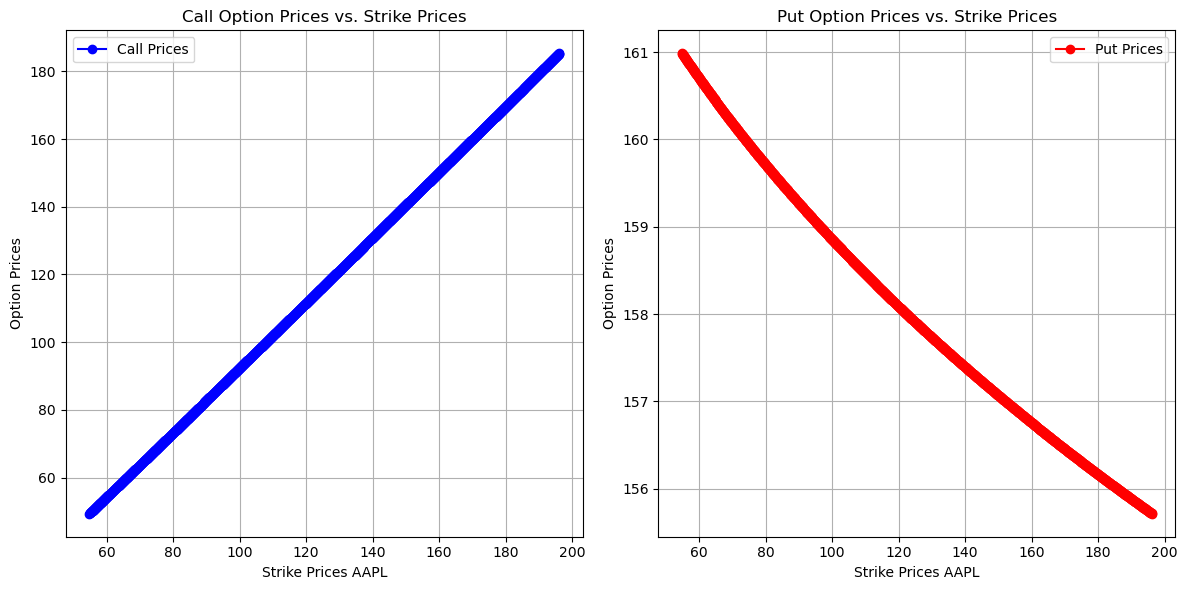

In [30]:
plot_individual_results(option_df)

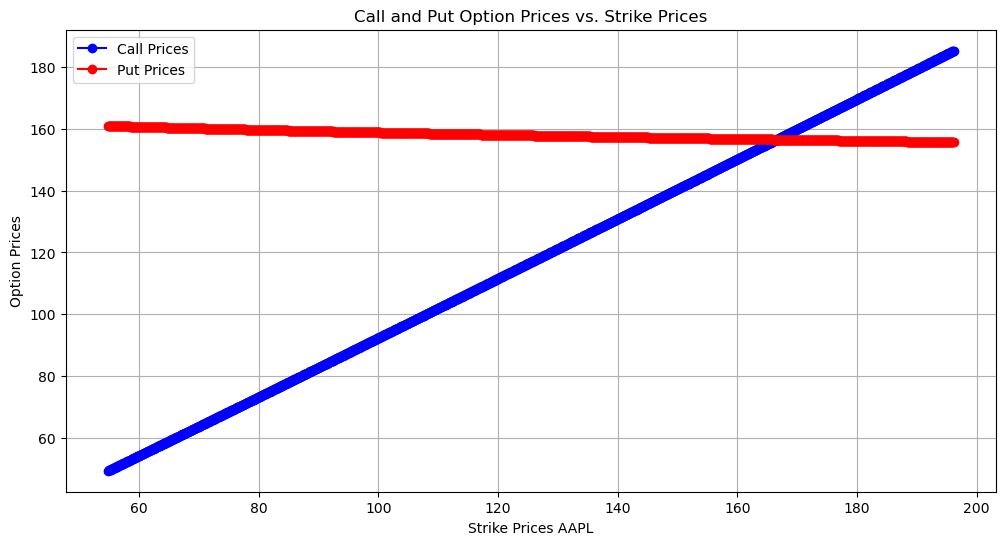

In [33]:
plot_all_together(option_df)

## Test results for FTSE 100

Latest SOFR Rate: 5.3100%
[*********************100%***********************]  1 of 1 completed
Stock Symbol: ^FTSE
Historical Volatility: 1.21%
Price Range: 4993.90 - 8014.30
Current Strike Price: 7494.60
Annualized Volatility: 19.27%


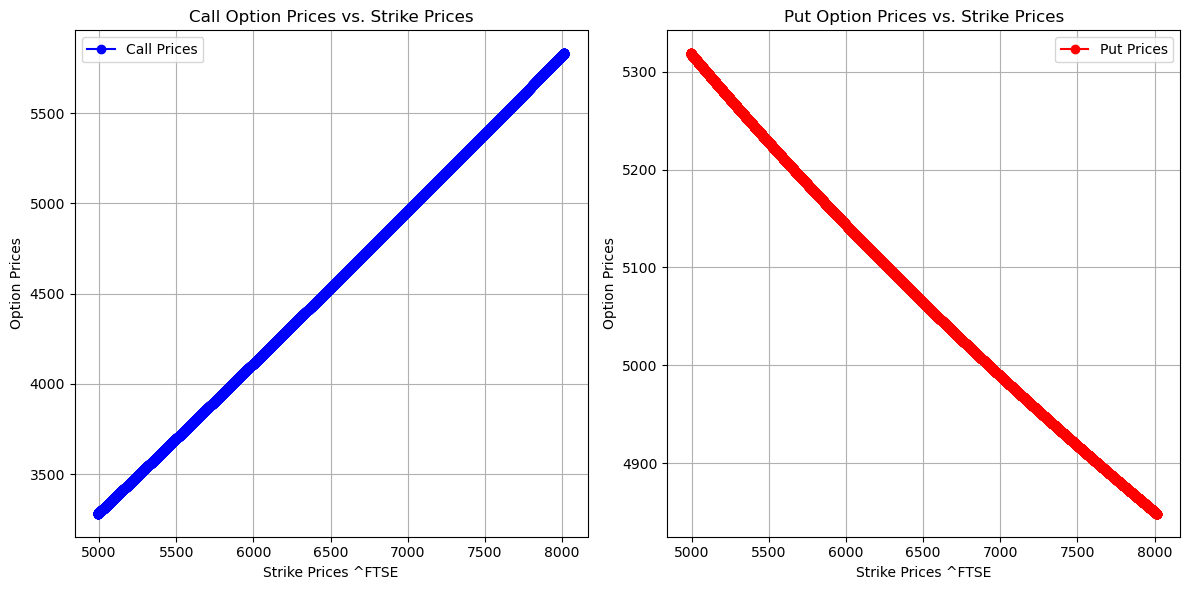

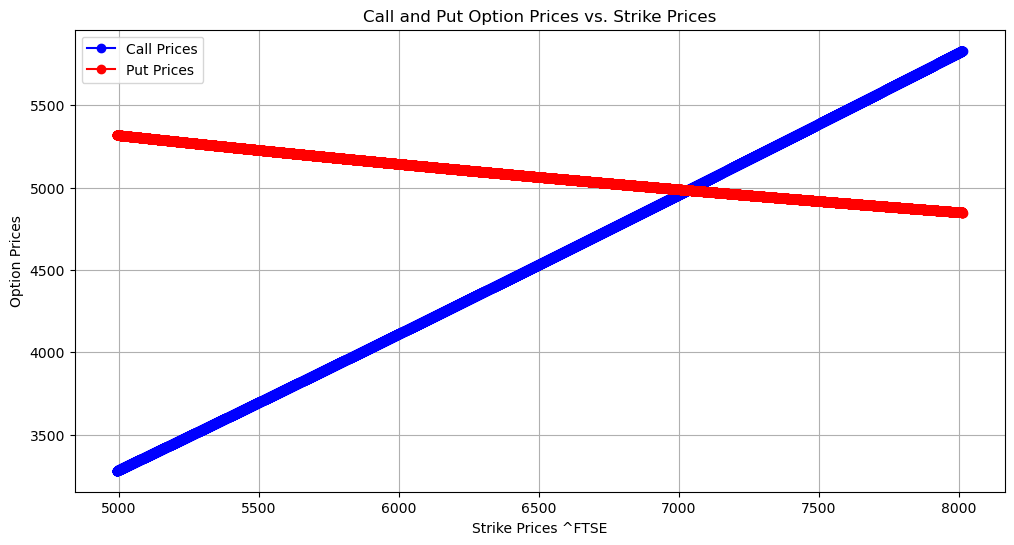

,Strike Prices,Call Prices,Put Prices
0,4993.899902,3280.698726,5318.739852
1,4993.999902,3280.780145,5318.721271
2,4994.099902,3280.861564,5318.702691
3,4994.199902,3280.942984,5318.684110
4,4994.299902,3281.024404,5318.665530
...,...,...,...
30199,8013.799902,5830.307411,4848.448538
30200,8013.899902,5830.394222,4848.435348
30201,8013.999902,5830.481032,4848.422159
30202,8014.099902,5830.567843,4848.408969


In [34]:
# Define the stock symbol and date range for historical data
stock_symbol = '^FTSE'  # Replace with the symbol of the stock you want to analyze
stock_start_date = '2020-01-01'  # Replace with your desired start date
stock_end_date = '2023-10-08'    # Replace with your desired end date

# Define the start and end dates
start_date = '2023-09-25'  # Replace with the desired date
end_date = '2023-09-25'    # Replace with the same date as start_date

sofr = download_sofr(start_date, end_date)

min_range, max_range, strike_price, volatility = download_data_ticker(stock_symbol, stock_start_date, stock_end_date)

# Input values
S_range = np.arange(min_range, max_range, 0.1)  # Range of underlying asset prices (AAPL stock price)
X = strike_price  # Option strike price
T = 0.012  # Time to expiration in years (3 days -> 3/252 = 0.012)
r = sofr  # Risk-free interest rate
sigma = volatility  # Volatility

option_df = generate_black_scholes_model_output(S_range, X, T, r, sigma)

# Print results
option_df.to_csv(f"{stock_symbol}.csv", index=False)
plot_individual_results(option_df)
plot_all_together(option_df)
option_df